# House Price
Training a model that can predict house price of diffrent houses in Tehran in USD

### Importing the required libraries 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
%matplotlib inline

### Reading the data and trying to understand it

In [2]:
df = pd.read_csv("houseprice.csv")

df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


## Cleaning the data

In [3]:
# Removing empty Address fields and converting to encoded labels
df['Address'].replace('', np.nan, inplace=True)
df.dropna(subset=['Address'], inplace=True)
le = preprocessing.LabelEncoder()
df['Address'] = le.fit_transform(df['Address'])

# Converting boolean variables to binary
df['Warehouse'].replace(False, 0, inplace=True)
df['Warehouse'].replace(True, 1, inplace=True)
df['Elevator'].replace(False, 0, inplace=True)
df['Elevator'].replace(True, 1, inplace=True)
df['Parking'].replace(True, 1, inplace=True)
df['Parking'].replace(False, 0, inplace=True)

# Removing redundant Area values 
df.Area = pd.to_numeric(df.Area, errors='coerce')
df.dropna(subset=['Area'], inplace=True)
df = df.drop(df.index[df['Area'] > 400])


Selecting some features that we will use to train our model.

In [4]:
cdf = df[['Area', 'Room', 'Warehouse', 'Parking', 'Elevator', 'Address', 'Price(USD)']]

cdf.head(9)

,Area,Room,Warehouse,Parking,Elevator,Address,Price(USD)
0,63.0,1,1,1,1,156,61666.67
1,60.0,1,1,1,1,156,61666.67
2,79.0,2,1,1,1,117,18333.33
3,95.0,2,1,1,1,152,30083.33
4,123.0,2,1,1,1,150,233333.33
5,70.0,2,1,1,0,106,68333.33
6,87.0,2,1,1,1,117,20000.00
7,59.0,1,1,1,1,156,71666.67
8,54.0,2,1,1,0,13,16433.33


### Plotting the datas to see the suitable relation

Text(0, 0.5, 'Price(USD)')

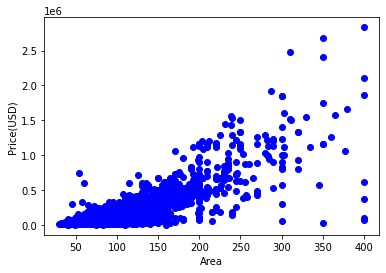

In [5]:
plt.scatter(cdf.Area, cdf['Price(USD)'],  color='blue')
plt.xlabel("Area")
plt.ylabel("Price(USD)")


Text(0, 0.5, 'Price(USD)')

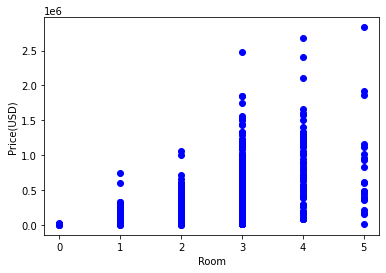

In [6]:
plt.scatter(cdf.Room, cdf['Price(USD)'],  color='blue')
plt.xlabel("Room")
plt.ylabel("Price(USD)")


Text(0, 0.5, 'Price(USD)')

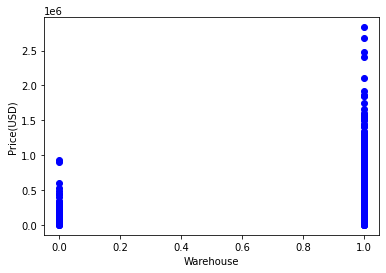

In [7]:
plt.scatter(cdf.Warehouse, cdf['Price(USD)'],  color='blue')
plt.xlabel("Warehouse")
plt.ylabel("Price(USD)")


Text(0, 0.5, 'Price(USD)')

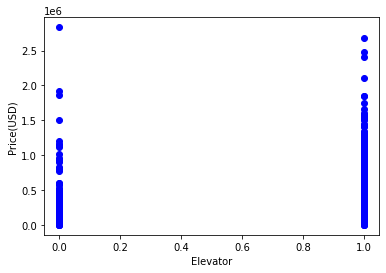

In [8]:
plt.scatter(cdf.Elevator, cdf['Price(USD)'],  color='blue')
plt.xlabel("Elevator")
plt.ylabel("Price(USD)")


Text(0, 0.5, 'Price(USD)')

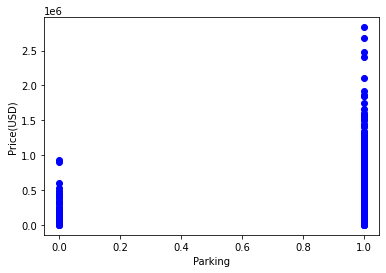

In [9]:
plt.scatter(cdf.Parking, cdf['Price(USD)'],  color='blue')
plt.xlabel("Parking")
plt.ylabel("Price(USD)")


Text(0, 0.5, 'Price(USD)')

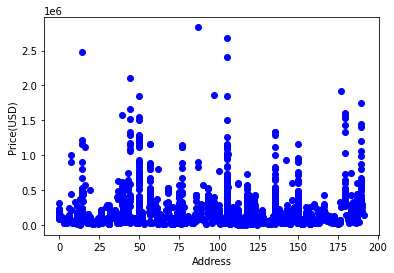

In [10]:
plt.scatter(cdf.Address, cdf['Price(USD)'],  color='blue')
plt.xlabel("Address")
plt.ylabel("Price(USD)")


## Splitting the Data

In [11]:
x = np.asanyarray(cdf[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address']])
y = np.asanyarray(cdf[['Price(USD)']])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=4924)

## Training the Model

In [12]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[  4200.58166528 -46777.25441722   2730.57570532  28433.36561938
    6084.62352428     47.68271142]]


## Evaluation

In [13]:
y_hat = regr.predict(x_test)
print('Variance score: %.2f' % regr.score(x_test, y_test))

Variance score: 0.77
